# Sarah's Titanic Data Set
**Author:** Sarah Howard 

**Date:** March 30. 2025

**Objective:** Predicting a Categorical Target and Evaluating Performance

## Introduction

Using the TItanic dataset, we are going to explore certain features to see if they had an impact on the outcome of surviving the Titanic sinking.


## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [256]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVC
from sklearn.metrics import classification_report


## Section 1. Load the Data

### 1.1 Load the dataset 

In [257]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [258]:
# Impute missing values for age usign the median:

titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill in missing values for embark_town using the mode:

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\Sarah\AppData\Local\Temp\ipykernel_3784\3742257838.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\Sarah\AppData\Local\Temp\ipykernel_3784\3742257838.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

### 2.2 Feature Engineering

In [259]:
# Create new features

# Add family_size - number of family members on board
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
 
# Convert categorical "sex" to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Convert categorical "embarked" to numeric
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Binary feature - convert "alone" to numeric
titanic['alone'] = titanic['alone'].astype(int)

## 3. Feature Selection and Justification

### 3.1 Choose features and target

We will do three input cases. 

#### First:

input features: alone

target: survived

#### Second:

input features - age (or another variable of your choice)

target: survived

#### Third:

input features -  age and family_size (or another combination of your choice)

target: survived

### 3.2 Define X (features) and y (target)

In [327]:
# Case 1: alone only 
# X = titanic[['alone']]
# y = titanic['survived']

# Case 2: age only (or your choice)
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age + family_size (or your choice)
X = titanic[['age', 'family_size']]
y = titanic['survived']

#### Reflection 3:

**Why are these features selected?**

The selected features should provide a good insight into whether the person survived on the Titanic.


**Are there features that are likely to be highly predictive of survival?**

Age and family size will most likely be highly predictive of family size.  Sex would have also been a good feature to predict survivability.

## 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data

In [328]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

In [329]:
# Create and train a decision tree model with no random initializer argument.

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

#### Evaluate model performance on training data

In [330]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



#### Evaluate model performance on test data:

In [331]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



### 4.4 Report Confusion Matrix (as a heatmap)

#### Plot a confusion matrix:

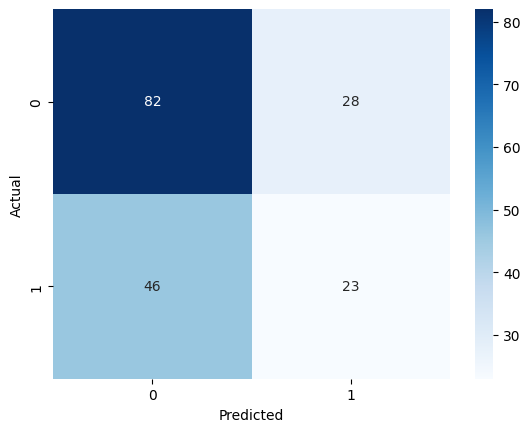

In [332]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

### 4.5 Report Decision Tree Plot

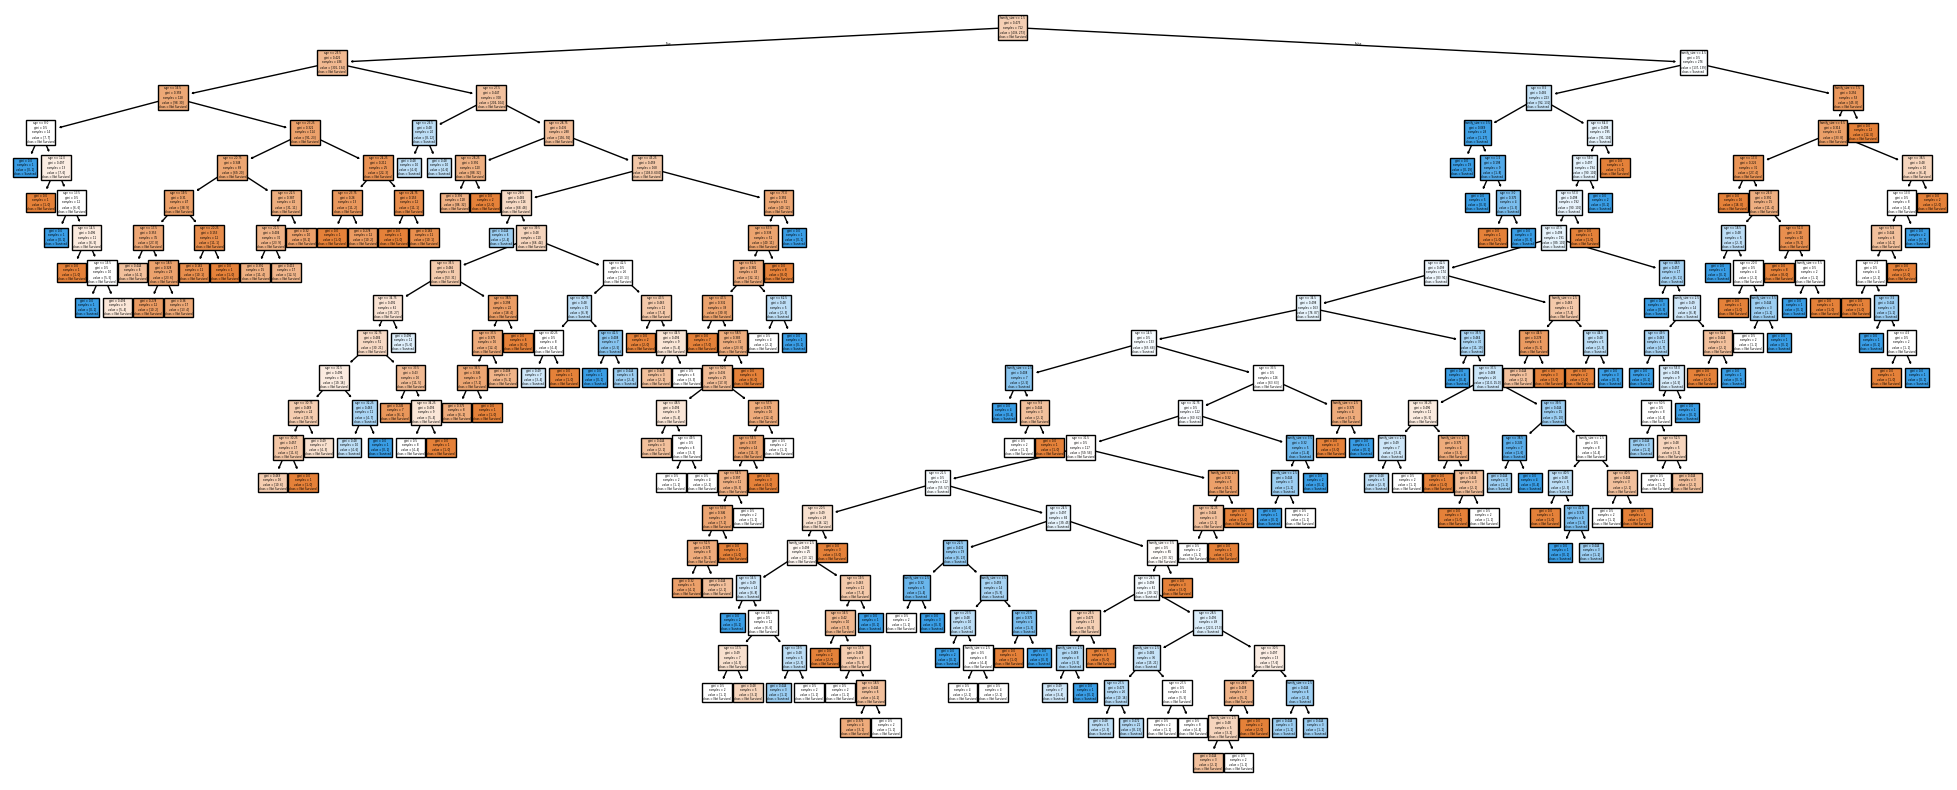

In [333]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

#### Results of the 3 test cases using a Decision Tree for the Training Data

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 62% | 62% |62% | 62% | Used the weighted average | 
|                   | Case 2 | age | 68% | 68% | 68% | 64% | Used the weighted average |
|                   | Case 3 | age + family_size | 77% | 77% | 77% | 76% | Used the weighted average|

#### Results of the 3 test cases using a Decision Tree for the Test Data

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 63% | 64% |63% | 63% | Used the weighted average | 
|                   | Case 2 | age | 61% | 58% | 61% | 55% | Used the weighted average |
|                   | Case 3 | age + family_size | 59% | 57% | 59% | 57% | Used the weighted average |

#### Reflection 4:
**How well did the different cases perform?**

The alone case appears to have performed the best when compared against the training data.

**Are there any surprising results?**

Test case 3 with the 2 factors appeared to really impact the results of the test data.

**Which inputs worked better** 

The alone factor appears to have worked the best.

## 5. Compare Alternative Models (SVC, NN)

### 5.1 Train and Evaluate Models

#### SVC (RBF Kernel Model)

In [334]:
# Train a SVC model using the default (RBF) kernel 

svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Predict and evaluate the SVC model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



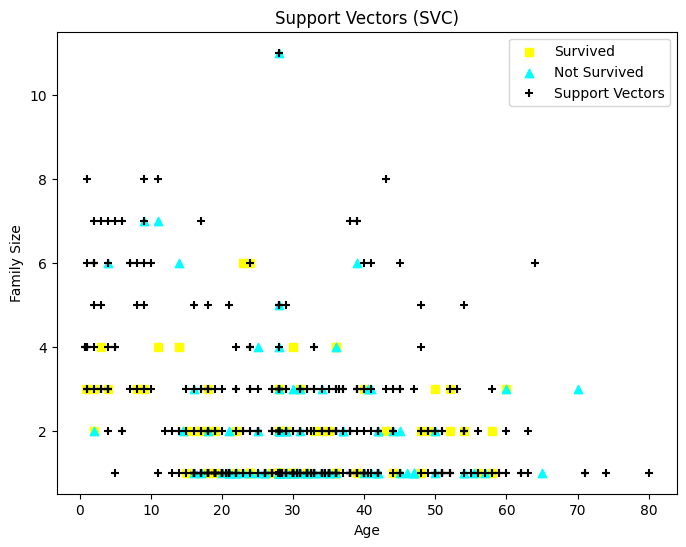

In [335]:
# Create data for charting - input target yes and input target no
survived_data = X_test.loc[y_test == 1, ['age', 'family_size']]
not_survived_data = X_test.loc[y_test == 0, ['age', 'family_size']]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_data['age'], survived_data['family_size'], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_data['age'], not_survived_data['family_size'], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (e.g., age)
    if svc_model.support_vectors_.shape[1] > 1:
        support_y = svc_model.support_vectors_[:, 1]  # Second feature (e.g., family_size)
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### SVC (Linear Kernel Model)

In [336]:
# Train a SVC model using the Linear kernel 

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Predict and evaluate the SVC model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

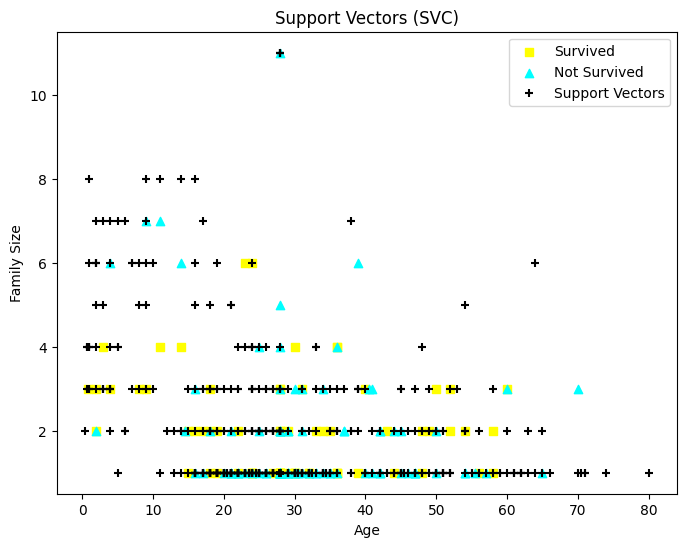

In [337]:
# Create data for charting - input target yes and input target no
survived_data = X_test.loc[y_test == 1, ['age', 'family_size']]
not_survived_data = X_test.loc[y_test == 0, ['age', 'family_size']]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_data['age'], survived_data['family_size'], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_data['age'], not_survived_data['family_size'], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (e.g., age)
    if svc_model.support_vectors_.shape[1] > 1:
        support_y = svc_model.support_vectors_[:, 1]  # Second feature (e.g., family_size)
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### SVC (Polynomial Kernel)

In [338]:
# Train a SVC model using the Polynomial Kernel with degree = 3

svc_model = SVC(kernel='poly', degree=3)
svc_model.fit(X_train, y_train)

# Predict and evaluate the SVC model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

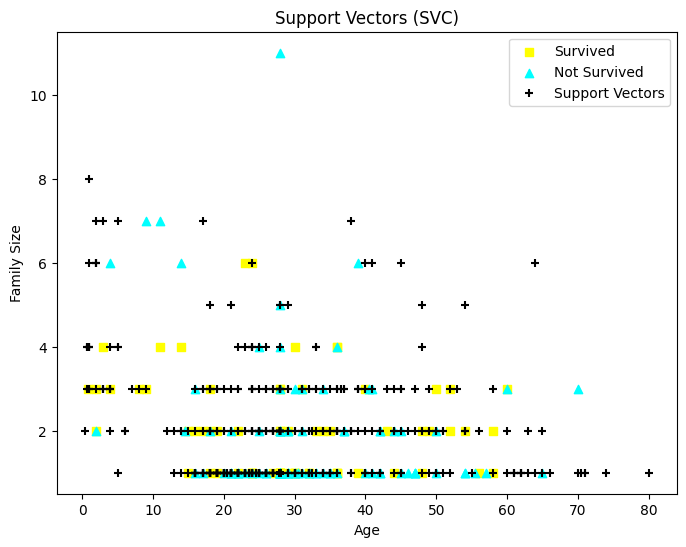

In [339]:
# Create data for charting - input target yes and input target no
survived_data = X_test.loc[y_test == 1, ['age', 'family_size']]
not_survived_data = X_test.loc[y_test == 0, ['age', 'family_size']]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_data['age'], survived_data['family_size'], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_data['age'], not_survived_data['family_size'], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (e.g., age)
    if svc_model.support_vectors_.shape[1] > 1:
        support_y = svc_model.support_vectors_[:, 1]  # Second feature (e.g., family_size)
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### SVC (Sigmoid Kernel)

In [340]:
# Train a SVC model using the Sigmoid Kernel

svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

# Predict and evaluate the SVC model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       110
           1       0.42      0.45      0.43        69

    accuracy                           0.55       179
   macro avg       0.53      0.53      0.53       179
weighted avg       0.55      0.55      0.55       179



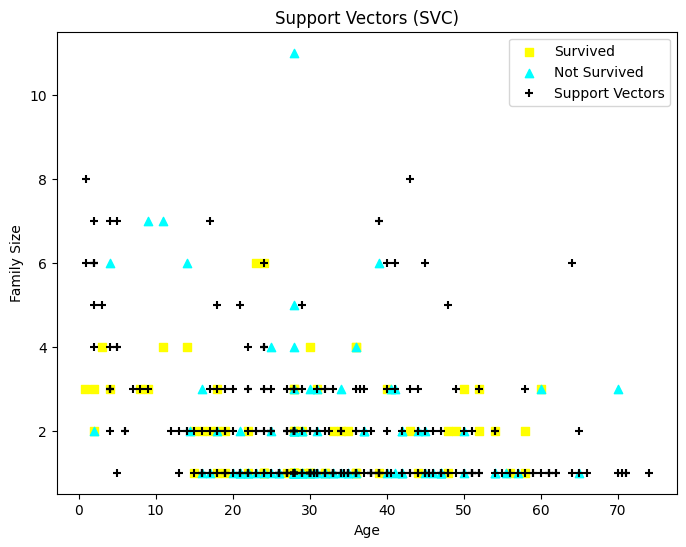

In [341]:
# Create data for charting - input target yes and input target no
survived_data = X_test.loc[y_test == 1, ['age', 'family_size']]
not_survived_data = X_test.loc[y_test == 0, ['age', 'family_size']]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_data['age'], survived_data['family_size'], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_data['age'], not_survived_data['family_size'], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (e.g., age)
    if svc_model.support_vectors_.shape[1] > 1:
        support_y = svc_model.support_vectors_[:, 1]  # Second feature (e.g., family_size)
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### Scattergram of SVC model (RBF Kernel):
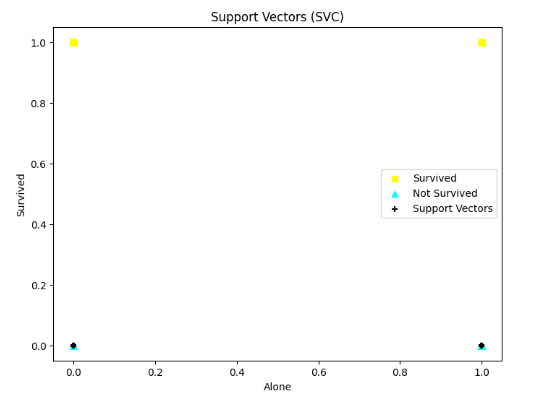 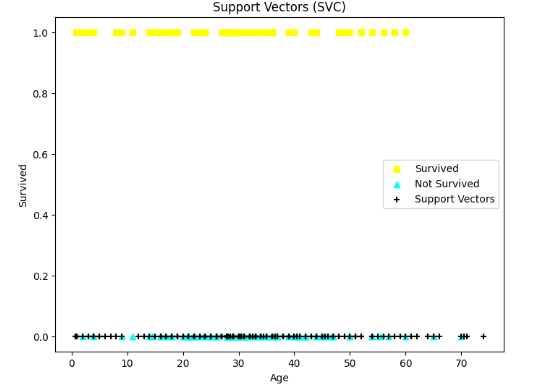 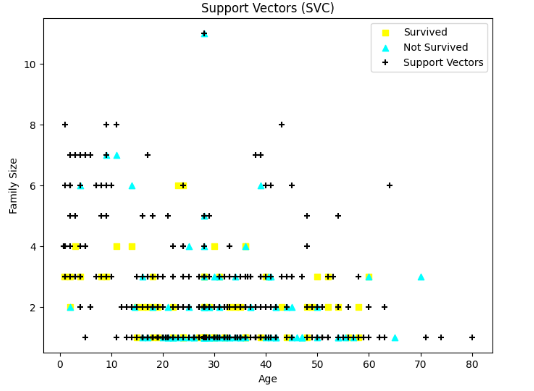

#### Scattergram of SVM model (Linear Kernel):
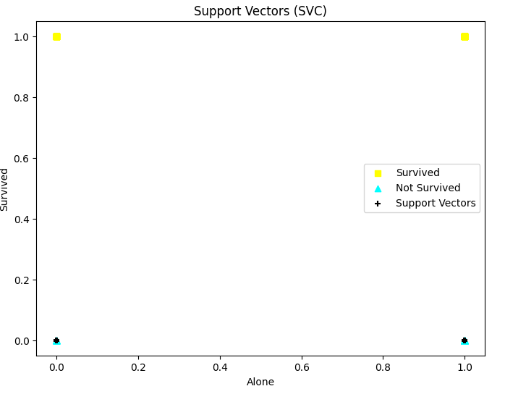 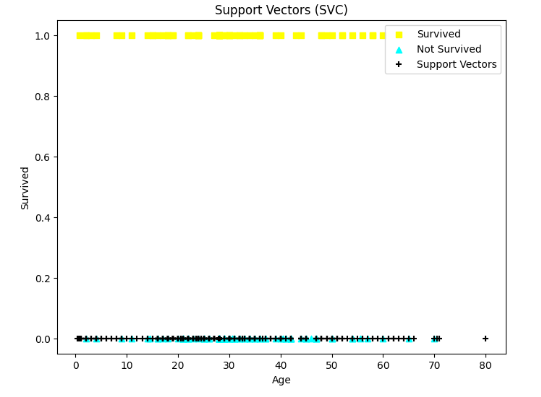 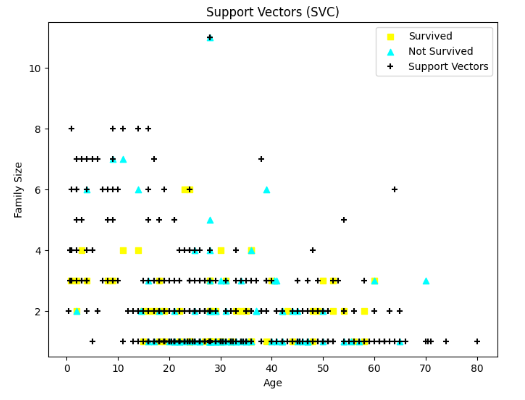

#### Scattergram of SVM Model (Poly Kernel):
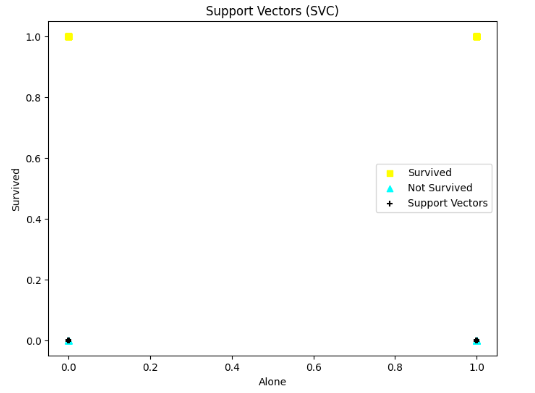 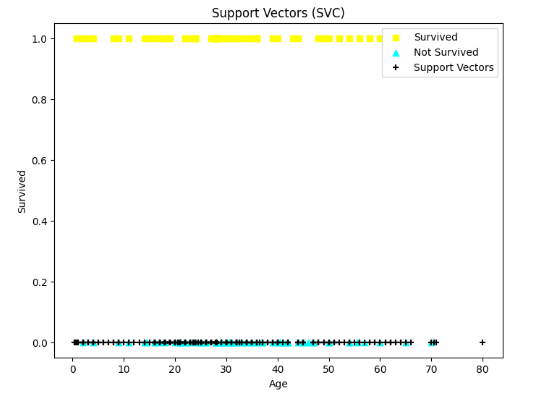 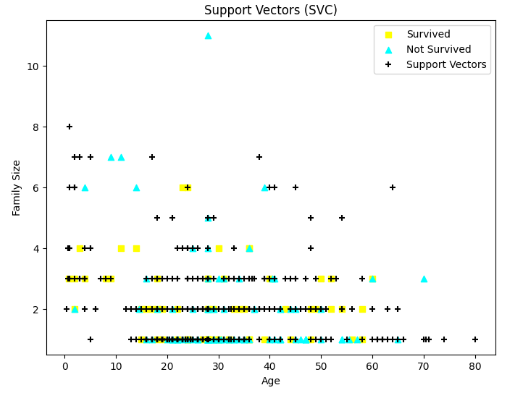

#### Scattergram of SVM Model (Sigmoid Kernel):
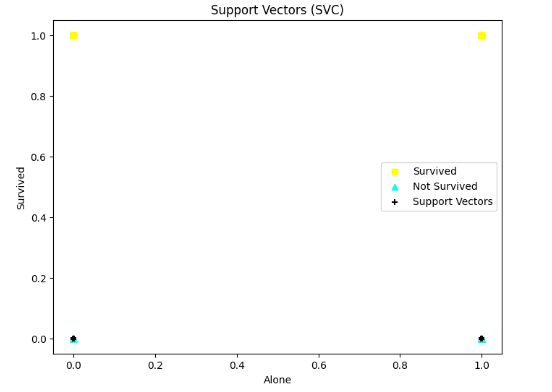 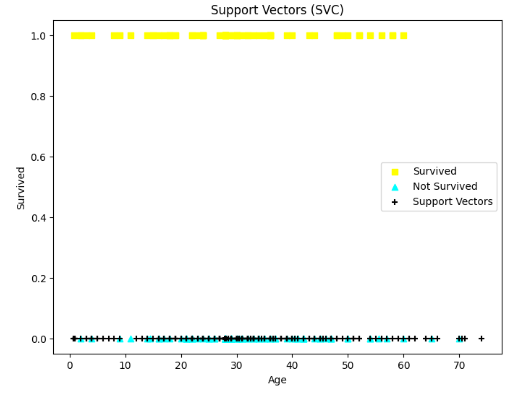 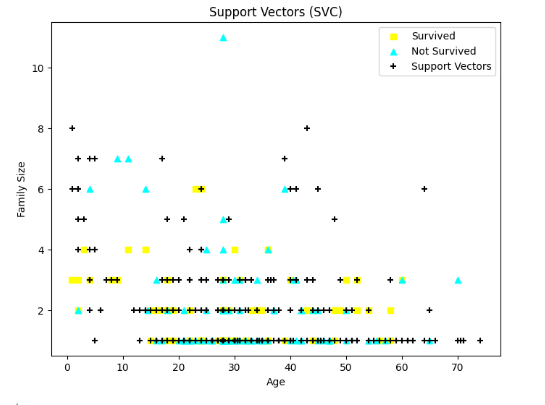

### 5.2 Train and Evaluate Model (NN MLP)

In [342]:
# Train a neural network model:

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

In [343]:
# Predict and evaluate Neural Network model:

y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       110
           1       0.56      0.46      0.51        69

    accuracy                           0.65       179
   macro avg       0.63      0.62      0.62       179
weighted avg       0.64      0.65      0.65       179



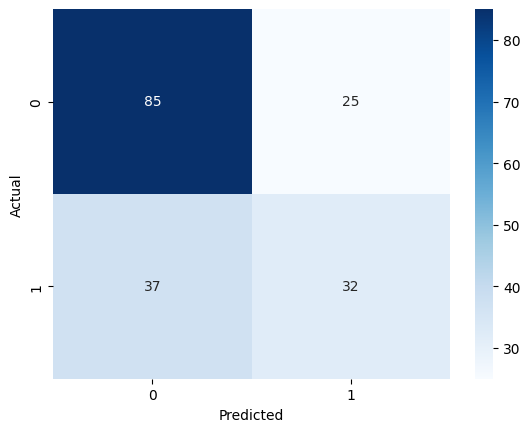

In [344]:
# Plot confusion matrix 

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Results of Each Model Type

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 63% | 64% |63% | 63% | Used the weighted average | 
|                   | Case 2 | age | 61% | 58% | 61% | 55% | Used the weighted average |
|                   | Case 3 | age + family_size | 59% | 57% | 59% | 57% | Used the weighted average |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (RBF Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | Used the weighted average |
|                    | Case 2 | age | 63% | 66% | 63% | 52% | Used the weighted average |
|                    | Case 3 | age + family_size | 63% | 66% | 63% | 52% | Used the weighted average |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Linear Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | Used the weighted average |
|                    | Case 2 | age | 61% | 38% | 61% | 47% | Used the weighted average |
|                    | Case 3 | age + family_size | 61% | 38% | 61% | 47% | Used the weighted average |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Poly Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | Used the weighted average |
|                    | Case 2 | age | 61% | 38% | 61% | 47% | Used the weighted average |
|                    | Case 3 | age + family_size | 61% | 38% | 61% | 47% | Used the weighted average |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Sigmoid Kernel)** | Case 1 | alone | 63% | 64% |63% | 63% | Used the weighted average |
|                    | Case 2 | age | 54% | 53% | 54% | 53% | Used the weighted average |
|                    | Case 3 | age + family_size | 55% | 55% | 55% | 55% | Used the weighted average |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Neural Network (MLP)** | Case 1 | alone | 63% | 64% | 63% | 63% | Used the weighted average |
|                    | Case 2 | age | 63% | 66% | 63% | 52% | Used the weighted average |
|                    | Case 3 | age + family_size | 67% | 66% | 67% | 64% | Used the weighted average |

#### Reflection 5:
**How well did each model perform?** 
The Nueral Network performed the best when using "age + family_size". The Linear Kernel and the Poly Kernel had poor precision results when looking at "age" and "age + family_size". Overall, all of the models were fairly consistent when only evaluating the "alone" feature. The Sigmoid Kernel appeared the worst overall across accuracy, precision, recall, and F1-Score.


**Are there any surprising results?** 
It is surprising that the Polynomial Kernel performed worse when more factors were added in.


**Why might one model outperform the others?** 
One model may outperform the others if it captures the non-linear relationships.

### 6. Final Thoughts & Insights

#### 6.1 Summarize Findings
Using the Neural Network model, age + family size were the most accurate at being able to predict survivability. The alone factor was pretty consistent across each model in predicting survivability.  Surprisingly, the polynomial kernel become less accurate when additional factors were considered.

#### 6.2 Discuss Challenges Faced
The missing values could be impacting the models. The models seemed to be most consistent when the factor was binomial.

#### 6.3 Next Steps
I decided to try testing using the NuSVC model and am reflecting the results below. The "age" factor scored consistently to the other models. However, "alone" and "age + family_size" performed much worse than the other models.  This could be due to the parameter being misconfigured. I had originally set the parameter at nu=.5, but the model was failing to run the "alone" factor. When I decreased the parameter to nu=.1, then results were available. However, I would not recommend this model for these factors.

In [345]:
# Train a NuSVC model using the Sigmoid Kernel
nu_svc_model = NuSVC(kernel='sigmoid', nu=0.1)  # nu is similar to C in SVC, range (0,1]
nu_svc_model.fit(X_train, y_train)

# Predict and evaluate the NuSVC model
y_pred_nu_svc = nu_svc_model.predict(X_test)

print("Results for NuSVC on test data:")
print(classification_report(y_test, y_pred_nu_svc))

Results for NuSVC on test data:
              precision    recall  f1-score   support

           0       0.57      0.35      0.43       110
           1       0.36      0.58      0.44        69

    accuracy                           0.44       179
   macro avg       0.46      0.46      0.44       179
weighted avg       0.49      0.44      0.43       179



#### Results for the 3 cases using NuSVC Model

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **NuSVC** | Case 1 | alone | 37% | 41% |37% | 38% | Used the weighted average | 
|                   | Case 2 | age | 63% | 61% | 63% | 61% | Used the weighted average |
|                   | Case 3 | age + family_size | 44% | 49% | 44% | 43% | Used the weighted average |
